In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# load preferred dataset

path = os.path.join(os.getcwd(), 'W11/diabetes.csv')

df = pd.read_csv(path)

In [3]:
from sklearn.model_selection import train_test_split

X, labels = df.iloc[:, : -1], df.iloc[:, -1]

y = pd.DataFrame([1 if labels.iloc[i] == 'pos' else -1 for i in range(labels.size)], columns=[labels.name])

# Shuffle and split the data
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3)

# Q1

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# TODO: Train an SVM on the above data using a linear kernel and set parameter C = 1
svm = SVC(kernel='linear')
svm.fit(X_train, y_train.to_numpy().ravel())

SVC(kernel='linear')

# Q2

In [5]:
# TODO: make predictions on train and hold out sets with trained SVM
y_pred_train = svm.predict(X_train)
y_pred_holdout = svm.predict(X_holdout)

# TODO: Record the classification accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
holdout_accuracy = accuracy_score(y_holdout, y_pred_holdout)
print("Train accuracy:", train_accuracy*100.00)
print("Holdout accuracy:", holdout_accuracy*100)

# TODO: Show confusion matrices
train_confusion_matrix = confusion_matrix(y_train, y_pred_train)
holdout_confusion_matrix = confusion_matrix(y_holdout, y_pred_holdout)
print("Train confusion matrix:")
print(train_confusion_matrix)
print("Holdout confusion matrix:")
print(holdout_confusion_matrix)

Train accuracy: 77.83985102420856
Holdout accuracy: 76.62337662337663
Train confusion matrix:
[[313  42]
 [ 77 105]]
Holdout confusion matrix:
[[128  17]
 [ 37  49]]


# Q3

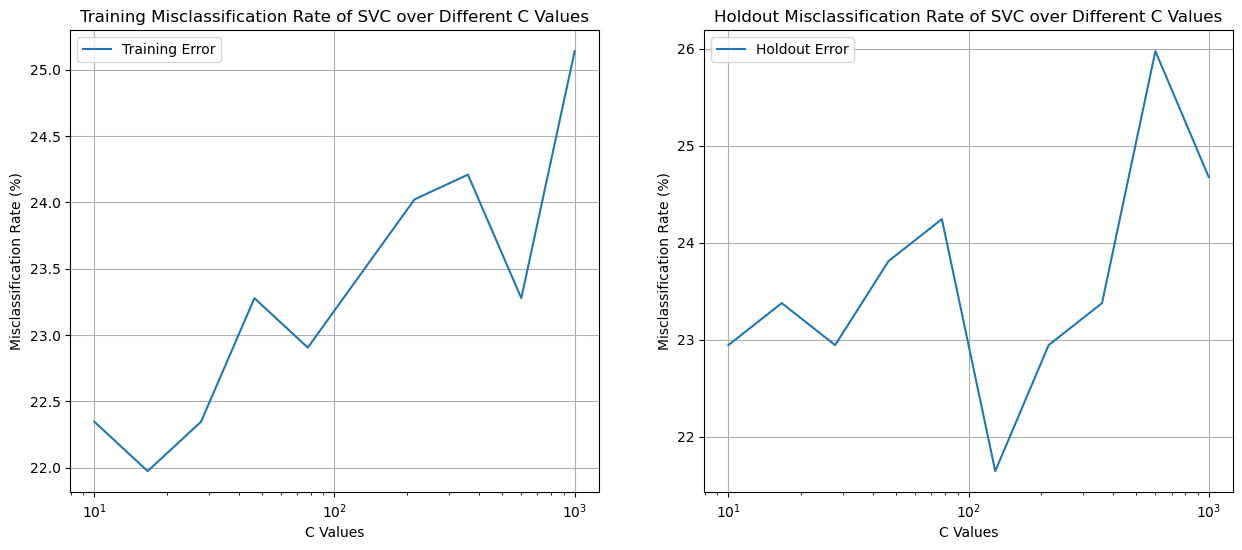

In [6]:
# Vary the C parameter on a logarithmic scale, and show how it influences the training

# TODO: Create a list of C values on logarithmic scale to try
C_values = np.logspace(1, 3, num=10)

# TODO: Train and evaluate a model for each C value
train_accuracy_list = []
holdout_accuracy_list = []

for C in C_values:
  # TODO: train SVM

  model = SVC(C=C, kernel='linear')
  model.fit(X_train, y_train.to_numpy().ravel())

  # TODO: Predict target values

  predict_train = model.predict(X_train)
  predict_holdout = model.predict(X_holdout)

  # TODO: Calculate and record accuracy

  train_accuracy = accuracy_score(y_train, predict_train)
  holdout_accuracy = accuracy_score(y_holdout, predict_holdout)

  train_accuracy_list.append(train_accuracy)
  holdout_accuracy_list.append(holdout_accuracy)


# TODO: Plot the training and testing error as a function of C

plt.figure(figsize=(15, 6))

train_error_list = [(1 - train_accuracy_list[i]) * 100 for i in range(len(C_values))]
holdout_error_list = [(1 - holdout_accuracy_list[i]) * 100 for i in range(len(C_values))]

plt.subplot(1, 2, 1)
plt.plot(C_values, train_error_list, label='Training Error')
plt.xlabel('C Values')
plt.ylabel('Misclassification Rate (%)')
plt.xscale('log')
plt.title('Training Misclassification Rate of SVC over Different C Values')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(C_values, holdout_error_list, label='Holdout Error')
plt.xlabel('C Values')
plt.ylabel('Misclassification Rate (%)')
plt.xscale('log')
plt.title('Holdout Misclassification Rate of SVC over Different C Values')
plt.legend()
plt.grid(True)

plt.show()

# Q4

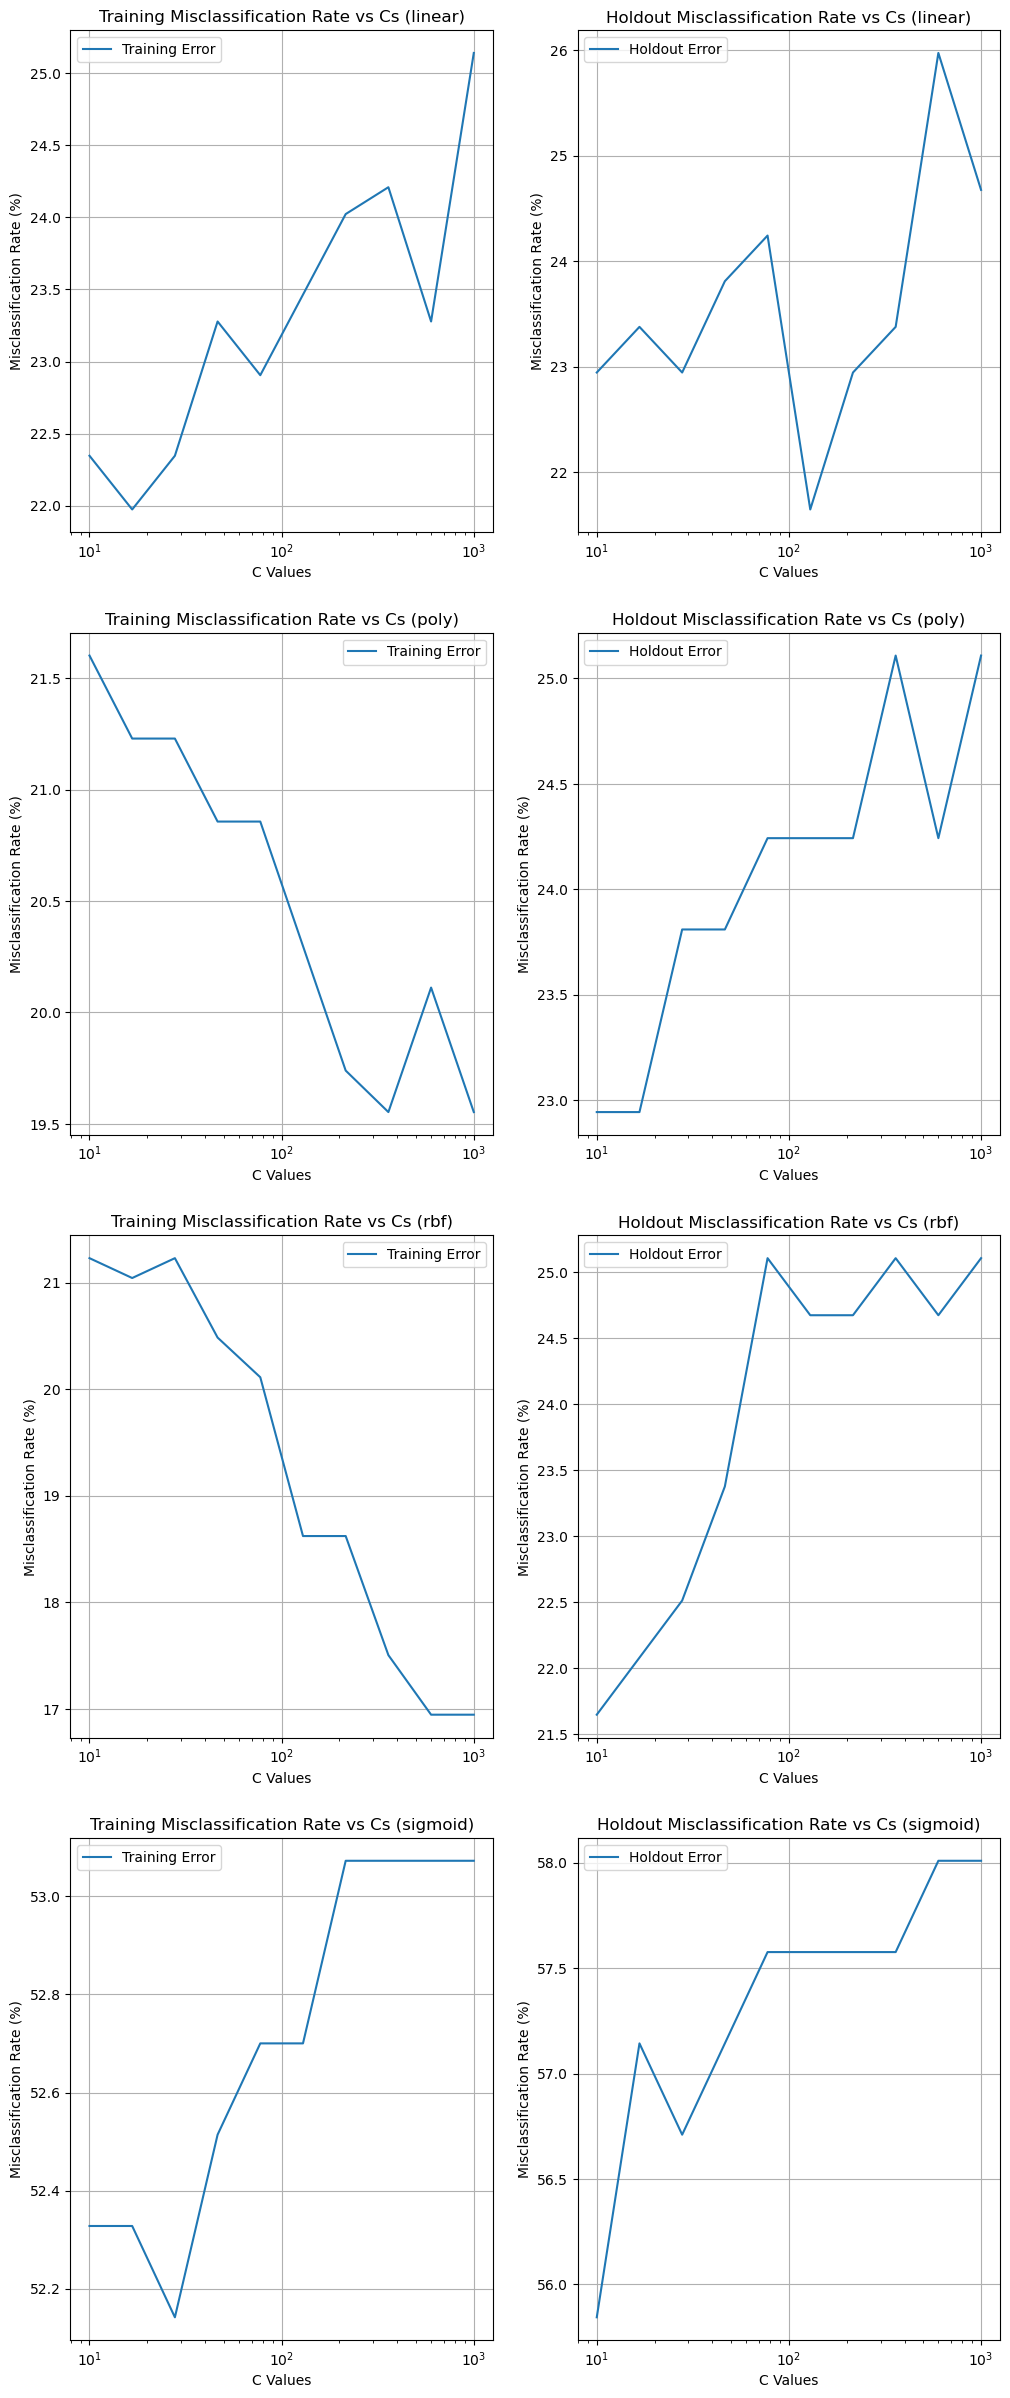

In [10]:
# Experiment with different kernel functions, for a list  of C values, and show how it influences the training and testing error

# TODO: Create a list of kernel functions to try

kernel_functions = ['linear', 'poly', 'rbf', 'sigmoid'] # Default parameters are used for all functions

# TODO: Train and evaluate a model for each kernel function
train_accuracy_list = []
holdout_accuracy_list = []

for kernel in kernel_functions:

  kernel_train_accuracy_list = []
  kernel_holdout_accuracy_list = []
  
  for C in C_values:
    # TODO: train SVM

    model = SVC(C=C, kernel=kernel)
    model.fit(X_train, y_train.to_numpy().ravel())

    # TODO: Predict target values

    predict_train = model.predict(X_train)
    predict_holdout = model.predict(X_holdout)

    # TODO: Calculate and record accuracy

    kernel_train_accuracy = accuracy_score(y_train, predict_train)
    kernel_holdout_accuracy = accuracy_score(y_holdout, predict_holdout)

    kernel_train_accuracy_list.append(kernel_train_accuracy)
    kernel_holdout_accuracy_list.append(kernel_holdout_accuracy)

  train_accuracy_list.append(kernel_train_accuracy_list)
  holdout_accuracy_list.append(kernel_holdout_accuracy_list)


# TODO: Plot the training and testing error as a function of kernel and C

plt.figure(figsize=(12, 30))

for i in range(len(kernel_functions)):

  train_error_list = [(1 - train_accuracy_list[i][j]) * 100 for j in range(len(C_values))]
  holdout_error_list = [(1 - holdout_accuracy_list[i][j]) * 100 for j in range(len(C_values))]

  plt.subplot(len(kernel_functions), 2, 2 * i + 1)
  plt.plot(C_values, train_error_list, label='Training Error')
  plt.xlabel('C Values')
  plt.ylabel('Misclassification Rate (%)')
  plt.xscale('log')
  plt.title(f'Training Misclassification Rate vs Cs ({kernel_functions[i]})')
  plt.legend()
  plt.grid(True)

  plt.subplot(len(kernel_functions), 2, 2 * i + 2)
  plt.plot(C_values, holdout_error_list, label='Holdout Error')
  plt.xlabel('C Values')
  plt.ylabel('Misclassification Rate (%)')
  plt.xscale('log')
  plt.title(f'Holdout Misclassification Rate vs Cs ({kernel_functions[i]})')
  plt.legend()
  plt.grid(True)

plt.show()

